In [1]:
'''
Capstone Project: CIND820 
Harpreet Kang
June 7, 2024
'''

'\nCapstone Project: CIND820 \nHarpreet Kang\nJune 7, 2024\n'

In [2]:
%matplotlib inline
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from scipy import stats
import statsmodels.api as sm
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Loading the libraries

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Displaying all the columns and rows

### Loading the Data

In [4]:
data = pd.read_excel('dataset_lfs_2024.xlsx')
# Loading the data

#### Filtering the Data and Fixing Decimal Places

In [ ]:
data.dropna(subset=["HRLYEARN"],inplace=True)
# Removing the null values in HRLYEARN column
data=data[data['MJH']==1]
# Filtering for single job holders
data=data[data['SCHOOLN']==1]
# Filtering for non students
data=data[data['FTPTMAIN']==1]
# Filtering for full-time workers
data=data[data['PERMTEMP']==1]
# Filtering for permanent workers
data['HRLYEARN']=data['HRLYEARN']/100
# The data dictionary for this dataset indicated that the last 2 values of this numeric column were the decimal points. So dividing the HRLYEARN column by 100 will add 2 decimal points. 
data['UHRSMAIN']=data['UHRSMAIN']/10
data['AHRSMAIN']=data['AHRSMAIN']/10
data['UTOTHRS']=data['UTOTHRS']/10
data['ATOTHRS']=data['ATOTHRS']/10
data['HRSAWAY']=data['HRSAWAY']/10
data['PAIDOT']=data['PAIDOT']/10
data['UNPAIDOT']=data['UNPAIDOT']/10
data['XTRAHRS']=data['XTRAHRS']/10
# The data dictionary for this dataset indicated that the last 1 decimial of the 8 numeric columns above were the decimal points
# So dividing the UHRSMAIN column by 00 will add 1 decimal points.
# For HRLYEARN, it was the last two decimal points

In [ ]:
#profile1 = ProfileReport(data, title="Profiling Report")
#profile1.to_file("EDA after eliminating blanks of Usual Hourly Wages (HRLYEARN).html")
# Generating the profiling report after removing the null values in HRLYEARN column


#### Mapping Variables to Discriptions

In [ ]:
full_variable_name_mapping={
'rec_num':'Order of record in file',
'survyear':'Survey year',
'survmnth':'Survey month',
'lfsstat':'Labour force status',
'prov':'Province',
'cma':'Nine largest CMAs',
'age_12':'Five-year age group of respondent',
'age_6':'Age in 2 and 3 year groups, 15 to 29',
'sex':'Sex of respondent',
'marstat':'Marital status of respondent',
'educ':'Highest educational attainment',
'mjh':'Single or multiple jobholder',
'everwork':'Identifies if a person has worked in the last year',
'ftptlast':'Full- or part-time status of last job',
'cowmain':'Class of worker, main job',
'immig':'Immigrant status',
'naics_21':'Industry of main job',
'noc_10':'Occupation at main job (noc_10)',
'noc_43':'Occupation at main job (noc_43)',
'yabsent':'Reason of absence, full week',
'wksaway':'Number of weeks absent from work',
'payaway':'Paid for time off, full-week absence only',
'uhrsmain':'Usual hours worked per week at main job',
'ahrsmain':'Actual hours worked per week at main job',
'ftptmain':'Full- or part-time status at main or only job',
'utothrs':'Usual hours worked per week at all jobs',
'atothrs':'Actual hours worked per week at all jobs',
'hrsaway':'Hours away from work, part-week absence only',
'yaway':'Reason for part-week absence',
'paidot':'Paid overtime hours in reference week',
'unpaidot':'Unpaid overtime hours in reference week',
'xtrahrs':'Number of overtime or extra hours worked',
'whypt':'Reason for part-time work',
'tenure':'Job tenure with current employer',
'prevten':'Job tenure with previous employer',
'hrlyearn':'Usual hourly wages',
'union':'Union status',
'permtemp':'Job permanency',
'estsize':'Establishment size',
'firmsize':'Firm size',
'durunemp':'Duration of unemployment',
'flowunem':'Flows into unemployment',
'unemftpt':'Job seekers by type of work sought and temporary layoffs by work status of last job',
'whylefto':'Reason for leaving job during previous year (whylefto)',
'whyleftn':'Reason for leaving job during previous year (whyleftn)',
'durjless':'Duration of joblessness',
'availabl':'Availability during the reference week',
'lkpubag':'Unemployed, used public employment agency',
'lkemploy':'Unemployed, checked with employers directly',
'lkrels':'Unemployed, checked with friends or relatives',
'lkatads':'Unemployed, looked at job ads',
'lkansads':'Unemployed, placed or answered ads',
'lkothern':'Unemployed, other methods',
'prioract':'Main activity before started looking for work',
'ynolook':'Reason for not looking for work during the reference week',
'tlolook':'Temporary layoff, looked for work during the last four weeks',
'schooln':'Current student status',
'efamtype':'Type of economic family',
'agyownk':'Age of youngest child',
'finalwt':'Standard final weight'}

# Mapping descriptions to the variable names

In [ ]:
#data.describe()
# Displaying the summary statistics of the data

In [ ]:
#data.info()
# Displaying the data types of the columns

### Calculating Missing Values in the Dataset

In [ ]:
data_missing_values= data.isnull().sum()
# Counting the missing values in each column
data_percent_missing = round(data.isnull().sum() * 100 / len(data),2)
# Calculating the percentage of missing values in each column
missing_values_percent=pd.DataFrame(data_percent_missing, columns=['Missing Values %'])
# Creating a dataframe to display the missing values percentage
missing_values_percent=missing_values_percent.rename_axis('Variables')
# Renaming the index

In [ ]:
#data.head()
# Displaying the first 5 rows of the data

### Creating a Function to generate Descriptive Statistics

In [ ]:
def statistics_table(data_frame):
    data_type_mapping={
    'rec_num':'Nominal',
    'survyear':'Ordinal',
    'survmnth':'Ordinal',
    'lfsstat':'Nominal',
    'prov':'Nominal',
    'cma':'Nominal',
    'age_12':'Ordinal',
    'age_6':'Ordinal',
    'sex':'Nominal',
    'marstat':'Nominal',
    'educ':'Ordinal',
    'mjh':'Nominal',
    'everwork':'Nominal',
    'ftptlast':'Nominal',
    'cowmain':'Nominal',
    'immig':'Nominal',
    'naics_21':'Nominal',
    'noc_10':'Nominal',
    'noc_43':'Nominal',
    'yabsent':'Nominal',
    'wksaway':'Nominal',
    'payaway':'Nominal',
    'uhrsmain':'Continuous',
    'ahrsmain':'Continuous',
    'ftptmain':'Nominal',
    'utothrs':'Continuous',
    'atothrs':'Continuous',
    'hrsaway':'Continuous',
    'yaway':'Nominal',
    'paidot':'Continuous',
    'unpaidot':'Continuous',
    'xtrahrs':'Continuous',
    'whypt':'Nominal',
    'tenure':'Discrete',
    'prevten':'Discrete',
    'hrlyearn':'Continuous',
    'union':'Nominal',
    'permtemp':'Nominal',
    'estsize':'Ordinal',
    'firmsize':'Ordinal',
    'durunemp':'Discrete',
    'flowunem':'Nominal',
    'unemftpt':'Nominal',
    'whylefto':'Nominal',
    'whyleftn':'Nominal',
    'durjless':'Discrete',
    'availabl':'Nominal',
    'lkpubag':'Nominal',
    'lkemploy':'Nominal',
    'lkrels':'Nominal',
    'lkatads':'Nominal',
    'lkansads':'Nominal',
    'lkothern':'Nominal',
    'prioract':'Nominal',
    'ynolook':'Nominal',
    'tlolook':'Nominal',
    'schooln':'Nominal',
    'efamtype':'Nominal',
    'agyownk':'Ordinal',
    'finalwt':'Continuous'}

    data_object_mapping={
    'rec_num':'Qualitative',
    'survyear':'Qualitative',
    'survmnth':'Qualitative',
    'lfsstat':'Qualitative',
    'prov':'Qualitative',
    'cma':'Qualitative',
    'age_12':'Qualitative',
    'age_6':'Qualitative',
    'sex':'Qualitative',
    'marstat':'Qualitative',
    'educ':'Qualitative',
    'mjh':'Qualitative',
    'everwork':'Qualitative',
    'ftptlast':'Qualitative',
    'cowmain':'Qualitative',
    'immig':'Qualitative',
    'naics_21':'Qualitative',
    'noc_10':'Qualitative',
    'noc_43':'Qualitative',
    'yabsent':'Qualitative',
    'wksaway':'Qualitative',
    'payaway':'Qualitative',
    'uhrsmain':'Quantitative',
    'ahrsmain':'Quantitative',
    'ftptmain':'Qualitative',
    'utothrs':'Quantitative',
    'atothrs':'Quantitative',
    'hrsaway':'Quantitative',
    'yaway':'Qualitative',
    'paidot':'Quantitative',
    'unpaidot':'Quantitative',
    'xtrahrs':'Quantitative',
    'whypt':'Qualitative',
    'tenure':'Quantitative',
    'prevten':'Quantitative',
    'hrlyearn':'Quantitative',
    'union':'Qualitative',
    'permtemp':'Qualitative',
    'estsize':'Qualitative',
    'firmsize':'Qualitative',
    'durunemp':'Qualitative',
    'flowunem':'Qualitative',
    'unemftpt':'Qualitative',
    'whylefto':'Qualitative',
    'whyleftn':'Qualitative',
    'durjless':'Qualitative',
    'availabl':'Qualitative',
    'lkpubag':'Qualitative',
    'lkemploy':'Qualitative',
    'lkrels':'Qualitative',
    'lkatads':'Qualitative',
    'lkansads':'Qualitative',
    'lkothern':'Qualitative',
    'prioract':'Qualitative',
    'ynolook':'Qualitative',
    'tlolook':'Qualitative',
    'schooln':'Qualitative',
    'efamtype':'Qualitative',
    'agyownk':'Qualitative',
    'finalwt':'Quantitative'}
    data_table=data_frame.columns.to_frame(index=False)
    data_table=data_table.rename(columns={0:'Variable Name'})
    columns=list(data_table.iloc[:,0] )
    data_table_mean_lst=[]
    data_table_median_lst=[]
    data_table_min_lst=[]
    data_table_max_lst=[]
    data_table_std_lst=[]
    data_table_object_lst=[]
    data_table_dtype_lst=[]

    for column in columns:
        data_table_mean_lst.append(round(data_frame[column].mean(),2))
        data_table_median_lst.append(round(data_frame[column].median(),2))
        data_table_min_lst.append(round(data_frame[column].min(),2))
        data_table_max_lst.append(round(data_frame[column].max(),2))
        data_table_std_lst.append(round(data_frame[column].std(),2))
        data_table_object_lst.append(data_object_mapping.get((column.lower())))
        data_table_dtype_lst.append(data_type_mapping.get((column.lower())))
    summary_statistics_table=pd.DataFrame(list(zip(columns,data_table_object_lst,data_table_dtype_lst,data_table_mean_lst,data_table_median_lst,data_table_min_lst,data_table_max_lst,data_table_std_lst)),
                                      columns=['Variable','Data','Data Type','Mean','Median','Min','Max','Standard Deviation'])
    return summary_statistics_table

# Created a function to generate the summary statistics table

In [ ]:
summary_statistics_table=statistics_table(data)
# Creating the summary statistics table

In [ ]:
# Removing mean, and standard deviation from non continous and discrete variables
summary_statistics_table["Mean"] = summary_statistics_table.apply(lambda row: row["Mean"] if row["Data Type"].lower() in ["continuous", "discrete"] else None, axis=1)
summary_statistics_table["Standard Deviation"] = summary_statistics_table.apply(lambda row: row["Standard Deviation"] if row["Data Type"].lower() in ["continuous", "discrete"] else None, axis=1)

# Removing the median from the nominal variables
summary_statistics_table["Median"] = summary_statistics_table.apply(lambda row: None if row["Data Type"].lower() == "nominal" else row["Median"] , axis=1)
summary_statistics_table=summary_statistics_table.merge(missing_values_percent,left_on='Variable',right_index=True)
summary_statistics_table.sort_values(by=['Missing Values %','Variable'],inplace=True)
summary_statistics_table.reset_index(drop=True,inplace=True)

summary_statistics_table_1=summary_statistics_table[['Variable','Data','Data Type']]
summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))
summary_statistics_table_1=summary_statistics_table_1[['Variable','Description','Data','Data Type']]
#summary_statistics_table_1.to_excel('Summary Statistics Table_Figure_3.xlsx',index=False)  

summary_statistics_table_2=summary_statistics_table.drop(columns=['Data','Data Type'],axis=1)
#summary_statistics_table_2.to_excel('Summary Statistics Table_Figure_2.xlsx',index=False)  

# Creating a function to generate the statistics table for excel

/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_19382/565589369.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))


### Feature Selection: Low Variance

In [ ]:
remove_attributes=list(summary_statistics_table[summary_statistics_table_2['Missing Values %']>56.00]['Variable'])
# Creating a list of variables with more than 56% missing values

# Dropping the below variables as they are not important
remove_attributes.append('SURVMNTH')
remove_attributes.append('SURVYEAR')
remove_attributes.append('REC_NUM')
remove_attributes.append('FINALWT')

##################################

remove_attributes.append('LFSSTAT')
# Already filtered for employed
remove_attributes.append('MJH')
# Only looking at single job holders
remove_attributes.append('FTPTMAIN')
# Deleting because we are only looking at full timer workers not parttime
remove_attributes.append('PERMTEMP')
# Already filtered for full time jobs
remove_attributes.append('SCHOOLN')
# Only looking at non students and not full time or part time students

### Feature Selection: Missing Values

In [ ]:
remove_attributes.append('HRSAWAY')
# Hours away from work, part-week absence only low variance has 79 perecent 0s
remove_attributes.append('PAIDOT')
# Paid over time has low variance 83% of zeros
remove_attributes.append('UNPAIDOT')
# Upaid overtime has 83% of zeros
remove_attributes.append('XTRAHRS')
# Contains over 70% of zeroes

In [ ]:
data2=data.drop(columns=remove_attributes)
# dropping the variables with more than 56% missing values and creating a new dataframe

### Mapping all of the Categorical Variables from the Data Dictionary

In [ ]:
data2['SEX']=data2['SEX'].map({1:0,2:1})
# Male is 0 and Female is 1. 
data2['IMMIG']=data2['IMMIG'].map({1:1,2:1,3:0})
# immigrant is 1 and non immigrant is 0data2['MARSTAT']=data2['MARSTAT'].map({1:1,2:0,3:0,4:0,5:0,6:0})
data2['MARSTAT']=data2['MARSTAT'].map({1:1,2:0,3:0,4:0,5:0,6:0})
# Married is 1 and not married is 0
data2['CMA']=data2['CMA'].map({0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})
# 1 is for the 9 largest CMAs and 0 is for the rest.

data2['EFAMTYPE']=data2['EFAMTYPE'].map({
    1:'Person not in an economic family',
    2:'Dual-earner couple, no children or none under 25',
    3:'Dual-earner couple, youngest child 0 to 17',
    4:'Dual-earner couple, youngest child 18 to 24',
    5:'Single-earner couple, male employed, no children or none under 25',
    6:'Single-earner couple, male employed, youngest child 0 to 17',
    7:'Single-earner couple, male employed, youngest child 18 to 24',
    8:'Single-earner couple, female employed, no children or none under 25',
    9:'Single-earner couple, female employed, youngest child 0 to 17',
    10:'Single-earner couple, female employed, youngest child 18 to 24',
    11:'Non-earner couple, no children or none under 25',
    12:'Non-earner couple, youngest child 0 to 17',
    13:'Non-earner couple, youngest child 18 to 24',
    14:'Lone-parent family, parent employed, youngest child 0 to 17',
    15:'Lone-parent family, parent employed, youngest child 18 to 24',
    16:'Lone-parent family, parent not employed, youngest child 0 to 17',
    17:'Lone-parent family, parent not employed, youngest child 18 to 24',
    18:'Other families'
})
# Mapping the economic family type

data2['COWMAIN']=data2['COWMAIN'].map({1:'Public sector employees',2:'Private sector employees'})
# Mapping the class of worker

data2['PROV']=data2['PROV'].map({10:'NL',11:'PE',12:'NS',13:'NB',24:'QC',35:'ON',46:'MB',47:'SK',48:'AB',59:'BC'})
# Mapping the provinces

data2['AGE_12']=data2['AGE_12'].map({
    1:'15-19'
    ,2:'20-24'
    ,3:'25-29'
    ,4:'30-34'
    ,5:'35-39'
    ,6:'40-44'
    ,7:'45-49'
    ,8:'50-54'
    ,9:'55-59'
    ,10:'60-64'
    ,11:'65-69'
    ,12:'70+'})
# Mapping the age groups

data2['EDUC']=data2['EDUC'].map({
    0:'0 to 8 years'
    ,1:'Some high school'
    ,2:'High school graduate'
    ,3:'Some post-secondary'
    ,4:'Post-secondary certificate or diploma'
    ,5:'Bachelor\'s degree'
    ,6:'Above bachelor\'s degree'})
# Mapping the education levels

data2['NAICS_21']=data2['NAICS_21'].map({
1:'Agriculture'
,2:'Forestry and logging and support activities for forestry'
,3:'Fishing, hunting and trapping'
,4:'Mining, quarrying, and oil and gas extraction'
,5:'Utilities'
,6:'Construction'
,7:'Manufacturing - durable goods'
,8:'Manufacturing - non-durable goods'
,9:'Wholesale trade'
,10:'Retail trade'
,11:'Transportation and warehousing'
,12:'Finance and insurance'
,13:'Real estate and rental and leasing'
,14:'Professional, scientific and technical services'
,15:'Business, building and other support services'
,16:'Educational services'
,17:'Health care and social assistance'
,18:'Information, culture and recreation'
,19:'Accommodation and food services'
,20:'Other services (except public administration)'
,21:'Public administration' 
})
# Mapping the industry

data2['FIRMSIZE']=data2['FIRMSIZE'].map({
     1:'Less than 20 employees'
    ,2:'20-99 employees'
    ,3:'100-500 employees'
    ,4:'More than 500 employees'})
# Mapping the firm size

data2['UNION']=data2['UNION'].map({
    1:'Union member',
    2:'Not a member but covered by a union contract or collective agreement',
    3:'Non-unionized'})
# Mapping the union status

data2['NOC_43']=data2['NOC_43'].map({
    1:'Legislative and senior management occupations',
    2:'Specialized middle management occupations',
    3:'Middle management occupations in retail and wholesale trade and customer services',
    4:'Middle management occupations in trades, transportation, production and utilities',
    5:'Professional occupations in finance',
    6:'Professional occupations in business',
    7:'Administrative and financial supervisors and specialized administrative occupations',
    8:'Administrative occupations and transportation logistics occupations',
    9:'Administrative and financial support and supply chain logistics occupations',
    10:'Professional occupations in natural sciences',
    11:'Professional occupations in applied sciences (except engineering)',
    12:'Professional occupations in engineering',
    13:'Technical occupations related to natural and applied sciences',
    14:'Health treating and consultation services professionals',
    15:'Therapy and assessment professionals',
    16:'Nursing and allied health professionals',
    17:'Technical occupations in health',
    18:'Assisting occupations in support of health services',
    19:'Professional occupations in law',
    20:'Professional occupations in education services',
    21:'Professional occupations in social and community services',
    22:'Professional occupations in government services',
    23:'Occupations in front-line public protection services',
    24:'Paraprofessional occupations in legal, social, community and education services',
    25:'Assisting occupations in education and in legal and public protection',
    26:'Care providers and public protection support occupations and student monitors, crossing guards and related occupations',
    27:'Professional occupations in art and culture',
    28:'Technical occupations in art, culture and sport',
    29:'Occupations in art, culture and sport',
    30:'Support occupations in art, culture and sport',
    31:'Retail sales and service supervisors and specialized occupations in sales and services',
    32:'Occupations in sales and services',
    33:'Sales and service representatives and other customer and personal services occupations',
    34:'Sales and service support occupations',
    35:'Technical trades and transportation officers and controllers',
    36:'General trades',
    37:'Mail and message distribution, other transport equipment operators and related maintenance workers',
    38:'Helpers and labourers and other transport drivers, operators and labourers',
    39:'Supervisors and occupations in natural resources, agriculture and related production',
    40:'Workers and labourers in natural resources, agriculture and related production',
    41:'Supervisors, central control and process operators in processing, manufacturing and utilities and aircraft assemblers and inspectors',
    42:'Machine operators, assemblers and inspectors in processing, manufacturing and printing',
    43:'Labourers in processing, manufacturing and utilities'
})
# Mapping the occupation

data2['NOC_10']=data2['NOC_10'].map({
    1:'Management occupations',
    2:'Business, finance and administration occupations, except management',
    3:'Natural and applied sciences and related occupations, except management',
    4:'Health occupations, except management',
    5:'Occupations in education, law and social, community and government services, except management',
    6:'Occupations in art, culture, recreation and sport, except management',
    7:'Sales and service occupations, except management',
    8:'Trades, transport and equipment operators and related occupations, except management',
    9:'Natural resources, agriculture and related production occupations, except management',
    10:'Occupations in manufacturing and utilities, except management'})
# Mapping the occupation


## Saving Checkpoint 1

In [ ]:
data3=data2[:]
# Creating a copy of the data

In [ ]:
labels=data3['HRLYEARN']
#Creating the label for splitting the data

features=data3.drop(columns=['HRLYEARN'],axis=1)
# Creating the features for splitting the data

#print(labels.shape)
#print(features.shape)

### Splitting the Data into Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, train_size=.7, random_state=42)
# Splitting the features and labels into training and testing datasets
# The training dataset is 80% of the data and the testing dataset is 20% of the data
# This is to ensure no data leekage occurs, and to ensure the model is not overfitting
# X_train will be used as the training set and the validation set for machine learning later on

### Feature Selection: Correlation Analysis

In [ ]:
# profile2 = ProfileReport(X_train, title="Profiling Report")
# profile2.to_file("EDA after removing non-correlated features.html")
# Creating a another profile report to examine the correlation just on the training data

In [ ]:
# Will be dropping the remaining measures becauase of high correlation with other variables
# This is removed from the X_train variable

remove_attributes2=[]
# Creating an empty list to store the variables to be removed
remove_attributes2.append('NOC_43')
# Correlated with COWMAIN, NOCS_10, SEX
remove_attributes2.append('NOC_10')
# Correlated with SEX, NOC_43, NAICS_21
remove_attributes2.append('ESTSIZE')
# Dropping MJH because it only contains one value, so it is not useful for the model
remove_attributes2.append('AHRSMAIN')
# Correlated with UTOTHRS, UHRSMAIN, ATOTHRS
remove_attributes2.append('UTOTHRS')
# Correlated with  ATOTHRS, UHRSMAIN, AHRSMAIN
remove_attributes2.append('ATOTHRS')
# Correlated with UTOTHRS, UHRSMAIN, ATOTHRS
remove_attributes2.append('COWMAIN')
# Removing cowmain because it is correlated with NAICS_21, UNION and NOC_43
remove_attributes2.append('EFAMTYPE')
# Removing efamtype because it is correlated with MASRSTAT

In [ ]:
X_train=X_train.drop(columns=remove_attributes2)
X_test=X_test.drop(columns=remove_attributes2)
# Dropping the variables with high correlation in both sets

In [ ]:
#profile3 = ProfileReport(X_train, title="Profiling Report")
#profile3.to_file("EDA after removing the correlated features.html")
# Dropping the variables with a high correlatoion and making another profile report

In [ ]:
master_list_of_variables_removed=remove_attributes+remove_attributes2
null_attributes_full_variable_name=[]
for attribute in master_list_of_variables_removed:
    null_attributes_full_variable_name.append(full_variable_name_mapping.get(attribute.lower()))
# Compiling all the variables that were removed from the dataset

null_attributes_table=pd.DataFrame({'Variable':master_list_of_variables_removed,'Description':null_attributes_full_variable_name})
# Creating a null attributes table

### Combining the X_train and Y_train into one Dataframe

In [ ]:
data3=X_train.join(y_train)
# Joing back the labels to the training set to have a complete dataset and make it easier to work with.

In [ ]:
#Creating a dataframe with the all the unique values in data3 and the number of classes in the categorical columns
unique_values_table=pd.DataFrame()
for column in data3.columns:
    unique_values_table[column]=[data3[column].nunique()]
unique_values_table=unique_values_table.T
unique_values_table=unique_values_table.rename(columns={0:'Unique Values'})
unique_values_table=unique_values_table.reset_index()
unique_values_table=unique_values_table.rename(columns={'index':'Variables'})
unique_values_table=unique_values_table.sort_values(by='Unique Values',ascending=False)
unique_values_table.reset_index(drop=True,inplace=True)
#unique_values_table.to_excel('Unique Values Table_Figure_4.xlsx',index=False)

## Saving Checkpoint 2

In [ ]:
data4=data3[:]
#Creating a checkpoint for the data

### Creating the Dummy Variables

In [ ]:
data4.rename(columns={'AGE_12': 'AGE'}, inplace=True)
# Renaming the age column
data4.rename(columns={'NAICS_21':'NAICS'},inplace=True)
# Renaming the age column

In [ ]:

categorical_features = ['PROV', 'CMA', 'AGE', 'SEX', 'MARSTAT', 'EDUC', 'IMMIG', 'NAICS', 'UNION', 'FIRMSIZE']
continuous_features = ['UHRSMAIN', 'TENURE']

y = data4['HRLYEARN']
X = data4.drop(columns=['HRLYEARN'])

# Settting up the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), continuous_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Transforming X
X_transformed = preprocessor.fit_transform(X)

# Checking the shape of the X
print("Shape of X:", X_transformed.shape)

# Get feature names after transformation
categorical_transformer = preprocessor.named_transformers_['cat']
onehot_feature_names = categorical_transformer.get_feature_names_out(categorical_features)
feature_names = np.append(continuous_features, onehot_feature_names)

# Counting of feature names
print("Number of feature names:", len(feature_names))

# Converting tge sparse matrix to a dense matrix
X_transformed_dense = X_transformed.toarray()

# Output the transformed features with the original index
features = pd.DataFrame(X_transformed_dense, columns=feature_names, index=data4.index)



Shape of X: (108675, 55)
Number of feature names: 55


#### Random Forest Graph of Feature Importance

In [ ]:
'''
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Parameter Grid
param_grid = {
    'model__n_estimators': [10],
    'model__max_features': [1.0],
    'model__max_depth': [None],
    'model__min_samples_split': [2],
    'model__min_samples_leaf': [1],
    'model__bootstrap': [True]
}
# KFolds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# RamdomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid,n_iter=1,cv=kf,random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X, y)

my_model = random_search.best_estimator_

# Getting the model trained
model = my_model.named_steps['model']

# Retreiving the feature names
categorical_transformer = my_model.named_steps['preprocessor'].named_transformers_['cat']
onehot_feature_names = categorical_transformer.get_feature_names_out(categorical_features)
feature_names = np.append(continuous_features, onehot_feature_names)

# Extracted the feature importances from the model
feature_importances = model.feature_importances_

# Created a DataFrame for better visualization
features_data_frame = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
features_data_frame = features_data_frame.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_data_frame, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
'''


"\n# Pipeline\npipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('model', RandomForestRegressor(random_state=42))\n])\n\n# Parameter Grid\nparam_grid = {\n    'model__n_estimators': [10],\n    'model__max_features': [1.0],\n    'model__max_depth': [None],\n    'model__min_samples_split': [2],\n    'model__min_samples_leaf': [1],\n    'model__bootstrap': [True]\n}\n# KFolds\nkf = KFold(n_splits=10, shuffle=True, random_state=42)\n\n# RamdomizedSearchCV\nrandom_search = RandomizedSearchCV(pipeline, param_distributions=param_grid,n_iter=1,cv=kf,random_state=42, n_jobs=-1)\n\n# Fit the model\nrandom_search.fit(X, y)\n\nmy_model = random_search.best_estimator_\n\n# Getting the model trained\nmodel = my_model.named_steps['model']\n\n# Retreiving the feature names\ncategorical_transformer = my_model.named_steps['preprocessor'].named_transformers_['cat']\nonehot_feature_names = categorical_transformer.get_feature_names_out(categorical_features)\nfeature_names = np.append(c

### Checking for Normality

#### Creating a Histogram

In [ ]:
def create_histogram(feature_series, titles, x_labels):
    # Create subplots
    fig, ax = plt.subplots(ncols=len(feature_series), nrows=1, figsize=(20, 7))

    # Plot each feature in a separate subplot
    for i, axi in enumerate(ax.flat):
        try:
            axi.hist(feature_series[i], bins=50, color='skyblue', edgecolor='black')
            axi.set_title(titles[i], fontsize=14)
            axi.set_xlabel(x_labels[i], fontsize=12)
            axi.set_ylabel('Frequency', fontsize=12)
        except IndexError:
            break
    plt.tight_layout()
    plt.show()


In [ ]:
#create_histogram([data4['HRLYEARN'], data4['UHRSMAIN'], data4['TENURE']],['Hourly Earnings (in dollars)', 'Usual Hours Worked (per week)', 'Job Tenure (in months)'], ['Dollars', 'Hours', 'Months'])

#### Shaprio-Wilk Test

In [ ]:
# Perform Shapiro-Wilk test to test for normality for UHRSMAIN and TENURE
for column in ['UHRSMAIN','TENURE']:
    stat, p = stats.shapiro(data4[column])
    print(f'Statistic: {stat}, p-value: {p}')

    alpha = 0.05
    if p > alpha:
        print(f'{column} looks like a normal distribution (fail to reject H0)')
    else:
        print(f'{column} does not look like a normal distribution (reject H0)')
# Perform Shapiro-Wilk test to test for HRLYYEARN training data
stat, p = stats.shapiro(data4['HRLYEARN'])
if p > alpha:
    print(f'HRLYEARN looks like a normal distribution (fail to reject H0)')
else:
    print(f'HRLYEARN does not look like a normal distribution (reject H0)')

Statistic: 0.6136554479598999, p-value: 0.0
UHRSMAIN does not look like a normal distribution (reject H0)
Statistic: 0.8706029653549194, p-value: 0.0
TENURE does not look like a normal distribution (reject H0)
HRLYEARN does not look like a normal distribution (reject H0)


/Users/hk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Linearity Assumptions Tested

In [ ]:
y=data4['HRLYEARN']
#The response variable

# Fitting the model
model = sm.OLS(y, features).fit()

model_summary = model.summary()
#print(model_summary)

# Getting the residuals
residuals = model.resid
fitted_values=model.fittedvalues

# Checking for independence (Durbin-Watson test)
dw_test = sm.stats.stattools.durbin_watson(residuals)
print('Durbin-Watson test statistic:', dw_test)

shapiro_test = stats.shapiro(residuals)
#print('Shapiro-Wilk test statistic:', shapiro_test)

mean_residuals = residuals.mean()
print('Mean of the residuals:', mean_residuals)

Durbin-Watson test statistic: 2.001183099965091
Mean of the residuals: 0.06025544396087536


/Users/hk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Apply log transformation to the dependent variable to fix the normality issue and check the residuals again
# This fixed the normaility issue but not the homoscedasticity issue
 
#transformed dependent variable (y)
log_y=np.log(y)

# Fit the model
log_model = sm.OLS(log_y, features).fit()

# Get the residuals
log_residuals = model.resid

log_fitted_values = log_model.fittedvalues

# Check for independence (Durbin-Watson test)
dw_test = sm.stats.stattools.durbin_watson(residuals)
#print('Durbin-Watson test statistic:', dw_test)

shapiro_test = stats.shapiro(residuals)
#print('Shapiro-Wilk test statistic:', shapiro_test)

# Check for mean of residuals equal to zero
mean_residuals = residuals.mean()
#print('Mean of residuals:', mean_residuals)



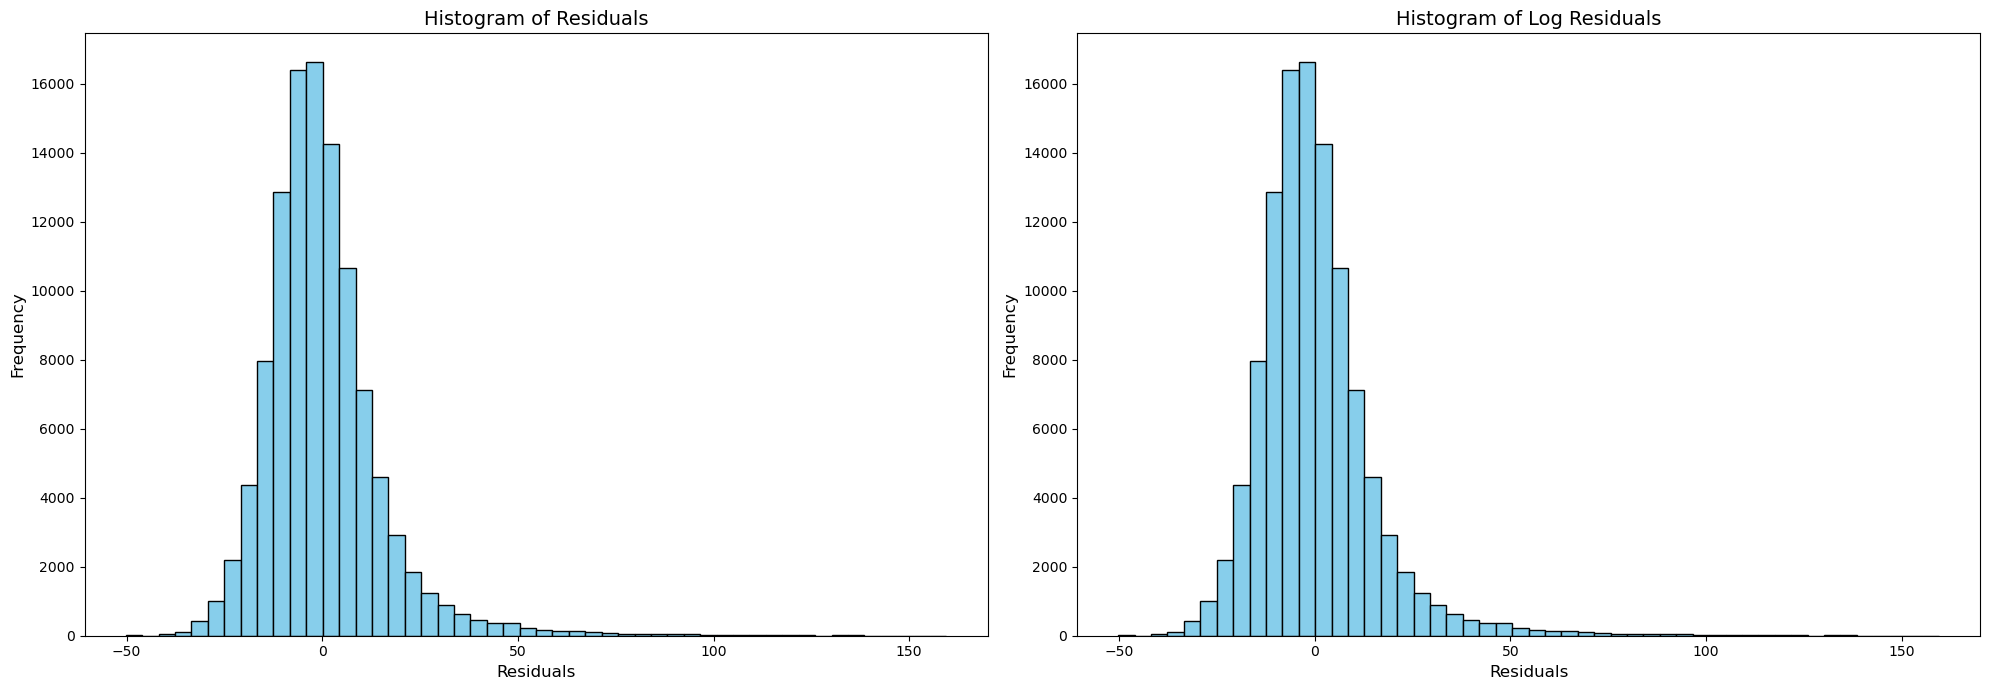

In [ ]:
create_histogram([residuals,log_residuals],['Histogram of Residuals', 'Histogram of Log Residuals'],['Residuals','Residuals'])

In [ ]:
def create_scatterplot(x,y, titles):
    # Create subplots
    fig, ax = plt.subplots(ncols=len(x), nrows=1, figsize=(20, 7))

    # Plot each feature in a separate subplot
    for i, axi in enumerate(ax.flat):
        try:
            axi.scatter(x=x[i],y=y[i], color='skyblue', edgecolor='black')
            axi.set_title(titles[i], fontsize=14)
            axi.set_xlabel("Fitted Values", fontsize=12)
            axi.set_ylabel('Residulas', fontsize=12)
        except IndexError:
            break
    plt.tight_layout()
    plt.show()

#create_scatterplot([fitted_values,log_fitted_values], [residuals,log_residuals],['Fitted values vs Residuals','Log Fitted values vs Residuals'])


### Log Transform the Dependent Value

In [41]:
data4['HRLYEARN']=np.log(data3['HRLYEARN'])

### Outlier Detection using IQR

#### Creating Boxplots

In [ ]:
# Feature series to be plotted
def create_box_plot(feature_series,feature_labels):
    # Customize flier properties for outliers
    flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                    linestyle='none', markeredgecolor='g')
    # Create subplots
    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 7))

    # Plot each feature in a separate subplot
    for i, axi in enumerate(ax.flat):
        try:
            axi.boxplot(feature_series[i], flierprops=flierprops, patch_artist=True,
                        boxprops=dict(facecolor='skyblue', color='black'),
                        capprops=dict(color='black'),
                        whiskerprops=dict(color='black'),
                        medianprops=dict(color='red'))
            axi.set_title(feature_labels[i], fontsize=14)
            axi.tick_params(axis='y', labelsize=12)
            axi.tick_params(axis='x', labelsize=0)
        except IndexError:
            break
    plt.tight_layout()
    plt.show()

In [ ]:
# Displaying the box plots
#create_box_plot([data4['HRLYEARN'], data4['UHRSMAIN'], data4['TENURE']],['Hourly Earnings (in dollars)', 'Usual Hours Worked (per week)', 'Job Tenure (in months)'])

In [ ]:
# 5 number summary for HRLYEARN.
Q1_HRLYEARN = np.percentile(data3['HRLYEARN'], 25)
Q2_HRLYEARN  = np.percentile(data3['HRLYEARN'], 50)
Q3_HRLYEARN  = np.percentile(data3['HRLYEARN'], 75)
min_value_HRLYEARN  = np.min(data3['HRLYEARN'])
max_value_HRLYEARN  = np.max(data3['HRLYEARN'])
IQR_HRLYEARN = Q3_HRLYEARN  - Q1_HRLYEARN 
print("Five Number Summary Q1,Q2,Q3,min_value,max_value, and IQR:",Q1_HRLYEARN ,Q2_HRLYEARN ,Q3_HRLYEARN , min_value_HRLYEARN ,max_value_HRLYEARN , IQR_HRLYEARN)

In [ ]:
Q1_UHRSMAIN = np.percentile(data3['UHRSMAIN'], 25)
Q2_UHRSMAIN = np.percentile(data3['UHRSMAIN'], 50)
Q3_UHRSMAIN = np.percentile(data3['UHRSMAIN'], 75)
min_value_UHRSMAIN = np.min(data3['UHRSMAIN'])
max_value_UHRSMAIN = np.max(data3['UHRSMAIN'])
IQR_UHRSMAIN = Q3_UHRSMAIN - Q1_UHRSMAIN
#print("Five Number Summary Q1,Q2,Q3,min_value,max_value, and IQR:",Q1_UHRSMAIN,Q2_UHRSMAIN,Q3_UHRSMAIN, min_value_UHRSMAIN,max_value_UHRSMAIN, IQR_UHRSMAIN)


In [ ]:
Q1_TENURE = np.percentile(data3['TENURE'], 25)
Q2_TENURE = np.percentile(data3['TENURE'], 50)
Q3_TENURE = np.percentile(data3['TENURE'], 75)
min_value_TENURE = np.min(data3['TENURE'])
max_value_TENURE = np.max(data3['TENURE'])
IQR_TENURE = Q3_TENURE - Q1_TENURE
#print("Five Number Summary Q1,Q2,Q3,min_value,max_value, and IQR:",Q1_TENURE,Q2_TENURE,Q3_TENURE, min_value_TENURE,max_value_TENURE, IQR_TENURE)


#### Number of Outliers

In [ ]:
# Checking for outliers in the response variable using IQR
outliers_HRLYEARN = data3[(data3['HRLYEARN'] < (Q1_HRLYEARN - 1.5 * IQR_HRLYEARN)) | (data3['HRLYEARN'] > (Q3_HRLYEARN + 1.5 * IQR_HRLYEARN))]
outliers_UHRSMAIN = data3[(data3['UHRSMAIN'] < (Q1_UHRSMAIN - 1.5 * IQR_UHRSMAIN)) | (data3['UHRSMAIN'] > (Q3_UHRSMAIN + 1.5 * IQR_UHRSMAIN))]
outliers_TENURE = data3[(data3['TENURE'] < (Q1_TENURE - 1.5 * IQR_TENURE)) | (data3['TENURE'] > (Q3_TENURE + 1.5 * IQR_TENURE))]
print("The number of outliers for HRLYEARN, UHRSMAIN, and TENURE are:",len(outliers_HRLYEARN),len(outliers_UHRSMAIN),len(outliers_TENURE))
print("The shape of the working dataset is:",data3.shape)
#The outliers account for approximately 18% of the training data. The outliers will be removed from the dataset.

## Saving Checkpoint 3

In [ ]:
data5=data4[:]
# Creating new data frame after removing the outliers
# Crating a newdataframe to remove the outliers from data3

### Removing Outliers

In [ ]:
#removing the outliers from the dataset
data5 = data5[(data5['HRLYEARN'] >= (Q1_HRLYEARN - 1 * IQR_HRLYEARN)) & (data5['HRLYEARN'] <= (Q3_HRLYEARN + 1.5 * IQR_HRLYEARN))]
data5 = data5[(data5['UHRSMAIN'] >= (Q1_UHRSMAIN - 1 * IQR_UHRSMAIN)) & (data5['UHRSMAIN'] <= (Q3_UHRSMAIN + 1.5 * IQR_UHRSMAIN))]
data5 = data5[(data5['TENURE'] >= (Q1_TENURE - 1 * IQR_TENURE)) & (data5['TENURE'] <= (Q3_TENURE + 1.5 * IQR_TENURE))]

In [ ]:
summary_statistics_table_continuous_variables_before_outliers=statistics_table(data4[['HRLYEARN','UHRSMAIN','TENURE']])
summary_statistics_table_continuous_variables_after_outliers=statistics_table(data5[['HRLYEARN','UHRSMAIN','TENURE']])
# Creating the summary statistics table for the continuous variables before and after removing the outliers
#print(summary_statistics_table_continuous_variables_before_outliers)
#print(summary_statistics_table_continuous_variables_after_outliers)

#summary_statistics_table_continuous_variables_before_outliers.to_excel('Continuous Variables Before Removing outliers.xlsx',index=False)  
#summary_statistics_table_continuous_variables_after_outliers.to_excel('Continuous Variables After Removing outliers.xlsx',index=False)  
# Exporting the summary statistics table for the continuous variables before and after removing the outliers

### Creating the Dataset For Apriori Algorithm

In [ ]:
# Concatenate the DataFrame and the Series
complete_date_apriori.drop(columns=['TENURE','UHRSMAIN'],inplace=True)
#Need to drop TENURE and UHRSMAIN because they scaled and transformed, but will need the original values in order to classify them below into 5 buckets.
complete_date_apriori.shape

In [ ]:
numeric_data=data5[['TENURE','UHRSMAIN','HRLYEARN']]
#These are the continuous variables
numeric_data.shape

In [ ]:
# List of numerical features to be created into a bins
numerical_variables = ['UHRSMAIN', 'TENURE','HRLYEARN']
# Initializing the KBinsDiscretizer with 'quantile' strategy so that the labels are balanced. 
bin_maker = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
# Fit and transform the data
numeric_data[numerical_variables] = bin_maker.fit_transform(numeric_data[numerical_variables])

In [ ]:
# Select the columns to one-hot encode
to_encode = numeric_data[numerical_variables]
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Fit and transform the selected columns
encoded_features = encoder.fit_transform(to_encode)
# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(numerical_variables)
# Convert the result back to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names,  index=data5.index)
#print("One-Hot Encoded DataFrame:\n", encoded_df.head())

In [ ]:
encoded_df.shape

In [ ]:
complete_date_apriori= complete_date_apriori.merge(encoded_df, left_index=True,right_index=True)
#add back the one hot encoded variables to the data_aprori dataframe

In [ ]:
complete_date_apriori.shape
#This will be used for the aprioror algorithm

In [ ]:
# Get the bin edges
bin_edges = bin_maker.bin_edges_
# Create a dictionary to map feature names to their bin edges
bin_edges_dict = {feature: edges for feature, edges in zip(numerical_variables, bin_edges)}
# Print bin edges for each feature
for feature, edges in bin_edges_dict.items():
    print(f"Bin edges for {feature}: {edges}")
    # Prepare data for DataFrame
bin_info = []
for feature, edges in bin_edges_dict.items():
    for i in range(len(edges) - 1):
        bin_info.append({
            'Feature': feature,
            'Bin Index': i,
            'Bin Start': edges[i],
            'Bin End': edges[i + 1]
        })
# Create DataFrame from bin information
bin_info_df = pd.DataFrame(bin_info)
# Display the DataFrame
print(bin_info_df)

bin_info_df.to_excel('Binning Information Table.xlsx',index=False)

### Running the Apriori Algorithm

In [ ]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(complete_date_apriori, min_support=0.1, use_colnames=True)
print("Frequent itemsets:\n", frequent_itemsets.head())

# Extract association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
#rint("Association rules:\n", rules.head())

# Define the desired RHS items
desired_rhs = ['HRLYEARN_0.0', 'HRLYEARN_1.0', 'HRLYEARN_2.0', 'HRLYEARN_3.0', 'HRLYEARN_4.0']

# Filter rules by RHS
filtered_rules = rules[rules['consequents'].apply(lambda x: any(item in x for item in desired_rhs))]

print("Filtered association rules:\n", filtered_rules)



In [ ]:
# Generate a report with the important rules
report = filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Save the report to a CSV file
#report.to_csv('important_association_rules_hrlyearn.csv', index=False)

#print("Report generated: important_association_rules_hrlyearn.csv")

#### Creating the Features and Labeles For Non-Linear Regeression

In [ ]:
fatures=data5.drop(columns=['HRLYEARN','TENURE','UHRSMAIN'])
features.drop(columns=['TENURE','UHRSMAIN'],inplace=True)
#dropping these features because they are scaled, and we need to keep the original values for the non-linear models, and scaled later.
continuous_features=data5[['TENURE', 'UHRSMAIN']]

label = data5['HRLYEARN']
#These will be used for the non-linear machine learning algoirthms. 

In [ ]:
features.shape

### Non-Linear Regression Models

In [ ]:
#This is Non-Linear Regression hyper tuning
continuous_features = ['UHRSMAIN', 'TENURE']
#Defining the continuous features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), continuous_features),
    ])
#Setting up the column transformer

kf = KFold(n_splits=10, shuffle=True, random_state=42)
#Initializing K-Folds

param_grids = {
    'XGB': {
        'model__n_estimators': [1000],
        'model__learning_rate': [0.05],
        'model__max_depth': [3, 4, 5],
        'model__subsample': [0.7, 0.8, 0.9],
        'model__colsample_bytree': [0.7, 0.8, 0.9],
        'model__gamma': [0, 1, 5],
        'model__reg_alpha': [0, 1, 5]
    },
    #'DT': {
    #    'model__criterion': ['mse'],
    #    'model__splitter': ['best', 'random'],
    #    'model__max_depth': [3, 4, 5],
    #    'model__min_samples_split': [2, 3, 4],
    #    'model__min_samples_leaf': [1, 2, 3]
    #},
    'RF': {
        'model__n_estimators': np.arange(100, 1100, 100),
        'model__max_features': ['sqrt', 'log2'],
        'model__max_depth': [None, 3, 4, 5],
        'model__min_samples_split': [2, 3, 4], 
        'model__min_samples_leaf': [1, 2, 3]

    },
    'SVR': {
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__degree': [2, 3, 4, 5],
        'model__gamma': ['scale', 'auto'],
        'model__C': [0.1, 1, 10, 100]
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'model__p': [1, 2]
    },
    'MLP': {
        'model__hidden_layer_sizes': [(100,), (200,), (300,)],
        'model__max_iter': [200, 300, 400]
    },
    'GB': {
        'model__n_estimators': np.arange(100, 1100, 100),
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__max_depth': [3, 4, 5],
        'model__subsample': [0.7, 0.8, 0.9],
        'model__max_features': ['sqrt', 'log2'],
        'model__min_samples_split': [2, 3, 4],
        'model__min_samples_leaf': [1, 2, 3]
    }
}
#Defining the parameter grids for each model


models = {
    #'XGB': XGBRegressor(),
    #'DT': DecisionTreeRegressor(random_state=42)
    'RF': RandomForestRegressor(random_state=42)
    #,
    #,'MLP':MLPRegressor()
    #,'SVR': SVR()
    #,'KNN': KNeighborsRegressor()
    #,'GB': GradientBoostingRegressor()
}
# Defining each model

# Perform RandomizedSearchCV for each model
scores = []
#creating an empty list to store the scores

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    
    grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[model_name], n_iter=10, cv=kf, random_state=42, scoring='neg_root_mean_squared_error',n_jobs=-1)
    grid_result = grid_search.fit(features, label)
    
    scores.append({
        'model': model_name,
        'best_score': grid_result.best_score_,
        'best_params': grid_result.best_params_
    })
#Running the randomized search for each model

scores_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
# Creating a datafreame for all the scores
print(scores_df)

In [ ]:
#training the best model
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
#splitting the data
model = RandomForestRegressor()
#initializing the model
model.fit(X_train, y_train)
#fitting the model
y_pred = model.predict(X_test)
#predicting the model
RMSE = mean_squared_error(y_test, y_pred,squared=False)
#calculating the r2 score
RMSE

In [ ]:
np.exp(0.2571711415225991)

#### Buliding the Dataset for Classifiers

In [ ]:
# Buliding Classifier dataset
classifier_features = features.copy()
classifier_label=label.copy()
classifier_label=classifier_label.values.reshape(-1,1)

In [ ]:
#Converting the continuous label into a categorical one
# Initializing the KBinsDiscretizer with 'quantile' strategy so that the label is balanced. 
bin_maker_for_classification = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
# Fit and transform the data
classifier_label = bin_maker_for_classification.fit_transform(classifier_label)
print(classifier_features.shape)
print(classifier_label.shape)

In [ ]:
# Convert the raveled array back into a DataFrame
#classifier_label_df = pd.DataFrame(classifier_label, columns=['classifier_label'], index=data5.index)
classifier_label=classifier_label.ravel()

### Classifier Models

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(classifier_features, classifier_label, test_size=0.2, random_state=42)

# Training and evaluating the KNN classifier
knn = RandomForestClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN accuracy:", accuracy)


#Basic models with no hyperparameter tuning
lr_model=LogisticRegression()
svc_model=SVC()
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier(n_estimators=1000)
nb_model = GaussianNB()
models=[lr_model,svc_model,dt_model,rf_model,nb_model]

train_score=[]
test_score=[]
for model in models:
    model.fit(X_train,y_train)
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))
    
print(pd.DataFrame({'Train Score':list(np.array(train_score).reshape(-1,1)),'Test Score':list(np.array(test_score).reshape(-1,1))},columns=['Train Score','Test Score'], index=models))

In [ ]:
#This is Classification hyper tuning
continuous_features = ['UHRSMAIN', 'TENURE']
#Defining the continuous features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), continuous_features)
    ])
#Setting up the column transformer

kf = KFold(n_splits=10, shuffle=True, random_state=42)
#Initializing K-Folds

param_grids = {
    'svm': {
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__degree': [2, 3, 4, 5],
        'model__gamma': ['scale', 'auto']
        
    },
    'decision_tree': {
        'model__max_depth':[1,10,20,30,40,50,60,70,80,90,100],
        'model__min_samples_split':[2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
        
    },
    'random_forest': {
        'model__n_estimators': [1,5,10,50,100,200,400,600,1200,2400]
    },
    'logistic_regression': {
            'model__solver':['newton-cg'],
            'model__C':np.logspace(-3,2,100),
            'model__penalty' : ['l2']
    }
}
#Defining the parameter grids for each model


models = {
    #'svm': SVC()
    #,'decision_tree': DecisionTreeRegressor(random_state=42)
    #,'random_forest': RandomForestRegressor(random_state=42)
    ,'logistic_regression': LogisticRegression()

}
# Defining each model

# Perform RandomizedSearchCV for each model
scores = []
#creating an empty list to store the scores

for model_name, model in models.items():
    pipeline_classifier = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])


    
    grid_search = RandomizedSearchCV(pipeline_classifier, param_distributions=param_grids[model_name], n_iter=1, cv=kf, random_state=42, n_jobs=-1)
    grid_result = grid_search.fit(features, label)
    
    scores.append({
        'model': model_name,
        'best_score': grid_result.best_score_,
        'best_params': grid_result.best_params_
    })
#Running the randomized search for each model

scores_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
# Creating a datafreame for all the scores
print(scores_df)


In [ ]:
models={    
    'svm':{
        'model': SVC(),
        'params': {
            'gamma':['scale','auto'],
            'C':np.logspace(-3,2,100),
            'kernel': ['rbf']
        }
    },
    
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators': [1,5,10,50,100,200,400,600,1200,2400]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params': {
            'max_depth':[1,10,20,30,40,50,60,70,80,90,100],
            'min_samples_split':[2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
        }
            
    },
    'logistic_regression': {
        'model': LogisticRegression(multi_class='multinomial'),
        'params':{
            'solver':['newton-cg'],
            'C':np.logspace(-3,2,100),
            'penalty' : ['l2']
        }
    }
}

In [ ]:
scores=[]
cv = KFold(n_splits=10)
for m, p in models.items():
    grid_search=RandomizedSearchCV(estimator=p['model'],param_distributions=p['params'],n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(classifier_features, classifier_label)
    scores.append({
        'model': m,
        'best_score':grid_result.best_score_,
        'best_params':grid_result.best_params_
    })

In [ ]:
lr_model=LogisticRegression()
svc_model=SVC()
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier(n_estimators=1000)
nb_model = GaussianNB()
models=[lr_model,svc_model,dt_model,rf_model,nb_model]

train_score=[]
test_score=[]
for model in models:
    model.fit(classifier_features,classifier_label)
    train_score.append(model.score(classifier_features,classifier_label))

    
print(pd.DataFrame({'Train Score':list(np.array(train_score).reshape(-1,1))}, index=models))
